In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json('../app/files/data.json')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [9]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,...,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,...,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,...,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,...,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,...,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,...,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [10]:
frauds = ['fraudster_event','fraudster','fraudster_att']

In [11]:
df['frauds'] = [True if i in frauds else False for i in df['acct_type']]

## Data Dictionary

acct_type             14337 non-null object our untransformed target
approx_payout_date    14337 non-null int64 is not expected to be predictive
body_length           14337 non-null int64 
channels              14337 non-null int64 
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64 converted to date
event_end             14337 non-null int64 converted to date
event_published       14238 non-null float64 converted to date
event_start           14337 non-null int64 converted to date
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64 is 1 or 0
has_header            8928 non-null float64 is 1 or 0
has_logo              14337 non-null int64 is 1 or 0
listed                14337 non-null object (changed y/n to True/False)
name                  14337 non-null object there are 13940 unique names
name_length           14337 non-null int64
num_order             14337 non-null int64
num_payouts           14337 non-null int64
object_id             14337 non-null int64
org_desc              14337 non-null object
org_facebook          14278 non-null float64
org_name              14337 non-null object
org_twitter           14278 non-null float64
payee_name            14337 non-null object
payout_type           14337 non-null object (blank,check, or ACH)
previous_payouts      14337 non-null object (dictionary of previous events related to the user) ADDED num of events as num_previous_payouts)
sale_duration         14182 non-null float64
sale_duration2        14337 non-null int64
show_map              14337 non-null int64
ticket_types          14337 non-null object
user_age              14337 non-null int64
user_created          14337 non-null int64
user_type             14337 non-null int64
venue_address         14337 non-null object
venue_country         13261 non-null object
venue_latitude        13261 non-null float64
venue_longitude       13261 non-null float64
venue_name            13261 non-null object
venue_state 

In [12]:
df['num_previous_payouts'] = [len(i) for i in df['previous_payouts']]
df['num_ticket_types'] = [len(i) for i in df['ticket_types']]
df['description_length'] = [len(i) for i in df['description']]
df['org_desc_length'] = [len(i) for i in df['org_desc']]
df['listed'] = [True if i=='y' else False for i in df['listed']]
# df['country_and_currency'] = [(i,df['currency'][idx]) for idx, i in enumerate(df['country'])]
df['payee_name_length'] = [len(i) for i in df['payee_name']]
df['event_length'] = df['event_end'] - df['event_start']
df['time_to_withdrawl'] = df['approx_payout_date'] - df['event_end']


## Feature Engineering

Fun things:
    
Counted the num_previous_payouts. previous_payouts was a set of dictionaries.

Did the same for ticket_types.

Did something similar for description_length, payee_name_length.

Wanted to add country_and_currency as a tuple. It worked in EDA, but not in the final model due to coding problems, so we removed it.

In [65]:

# df['country_match'] = [1 if df['country'][idx] == i else 0 for idx,i in df['venue_country']]

In [14]:

from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

In [15]:
df_test = df.copy()

In [54]:
keep_cols = ['fb_published','sale_duration2','num_previous_payouts','payee_name_length','gts','num_ticket_types','num_order','channels','description_length','org_desc_length','num_payouts','user_type','has_logo','show_map','listed','delivery_method','payout_type','has_analytics','name_length','frauds']
df_test = df[keep_cols]
df_test = pd.get_dummies(df_test, columns = ['user_type','delivery_method','payout_type'])
Y = df_test.pop('frauds')
X = df_test
X_train, X_test, Y_train, Y_test = tts(X,Y)
rfc1 = RandomForestClassifier(n_estimators=500,max_features=int(len(X.columns)**(0.5)+1))
rfc1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
print "test error:", rfc1.score(X_test,Y_test)
print "train score:", rfc1.score(X_train,Y_train)

test error: 0.988284518828
train score: 0.999906994048


In [56]:
a = X.columns.tolist()
print a

[u'fb_published', u'sale_duration2', 'num_previous_payouts', 'payee_name_length', u'gts', 'num_ticket_types', u'num_order', u'channels', 'description_length', 'org_desc_length', u'num_payouts', u'has_logo', u'show_map', u'listed', u'has_analytics', u'name_length', 'user_type_1', 'user_type_2', 'user_type_3', 'user_type_4', 'user_type_5', 'user_type_103', 'delivery_method_0.0', 'delivery_method_1.0', 'delivery_method_3.0', u'payout_type_', u'payout_type_ACH', u'payout_type_CHECK']


In [57]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
from sklearn.metrics import confusion_matrix as coma

In [59]:
y_predict = rfc1.predict(X_test)


In [60]:
# logreg = LogisticRegression()
# logreg.fit(X_train,Y_train)
# y_predict = logreg.predict(X_test)

# KNC = KNeighborsClassifier()
# KNC.fit(X_train,Y_train)
# y_predict = KNC.predict(X_test)

# DTC = DecisionTreeClassifier()
# DTC.fit(X_train,Y_train)
# y_predict = DTC.predict(X_test)


In [61]:

conmatrix1 = coma(Y_test,y_predict)

tn, fp, fn, tp = conmatrix1.ravel()
print conmatrix1
print tn, fp, fn, tp


precision = tp / float(tp + fp)
recall = tp / float(tp + fn)
accuracy = (tp + tn) / float(tp + tn +fp +fn)
print 'Precision is: ', precision
print 'Recall is: ', recall
print 'Accuracy is: ', accuracy

[[3252   14]
 [  28  291]]
3252 14 28 291
Precision is:  0.954098360656
Recall is:  0.912225705329
Accuracy is:  0.988284518828


Decision Tree:
[[3200   54]
 [  50  281]]
tn, fp, fn, tp
3200 54 50 281
Precision is:  0.838805970149
Recall is:  0.848942598187
Accuracy is:  0.970990237099

KNN:
[[3201   58]
 [ 222  104]]
tn, fp, fn, tp
3201 58 222 104
Precision is:  0.641975308642
Recall is:  0.319018404908
Accuracy is:  0.92189679219

Logistic Regression:
[[3230   29]
 [ 122  204]]
tn, fp, fn, tp
3230 29 122 204
Precision is:  0.875536480687
Recall is:  0.625766871166
Accuracy is:  0.957880055788

## Those are just all terrible
So we went with the Random Forest Tree Classifier.

The Decision Tree, Logistic Regression, KNN were just terrible.

We wanted to maximize recall, and precision - with recall being the preference if a tradeoff exists.

Random Forest Tree Classifier:
[[3252   14]
 [  28  291]]
tn, fp, fn, tp
3252 14 28 291
Precision is:  0.954098360656
Recall is:  0.912225705329
Accuracy is:  0.988284518828

## Feature Importance
We found that the number of related events was the strongest feature.

Other important features:
    Payout type blank, 
    Sale Duration, 
    gts - whatever that is, 
    name length, 
    description length, 
    User type 1 - whatever that is
    
    
    

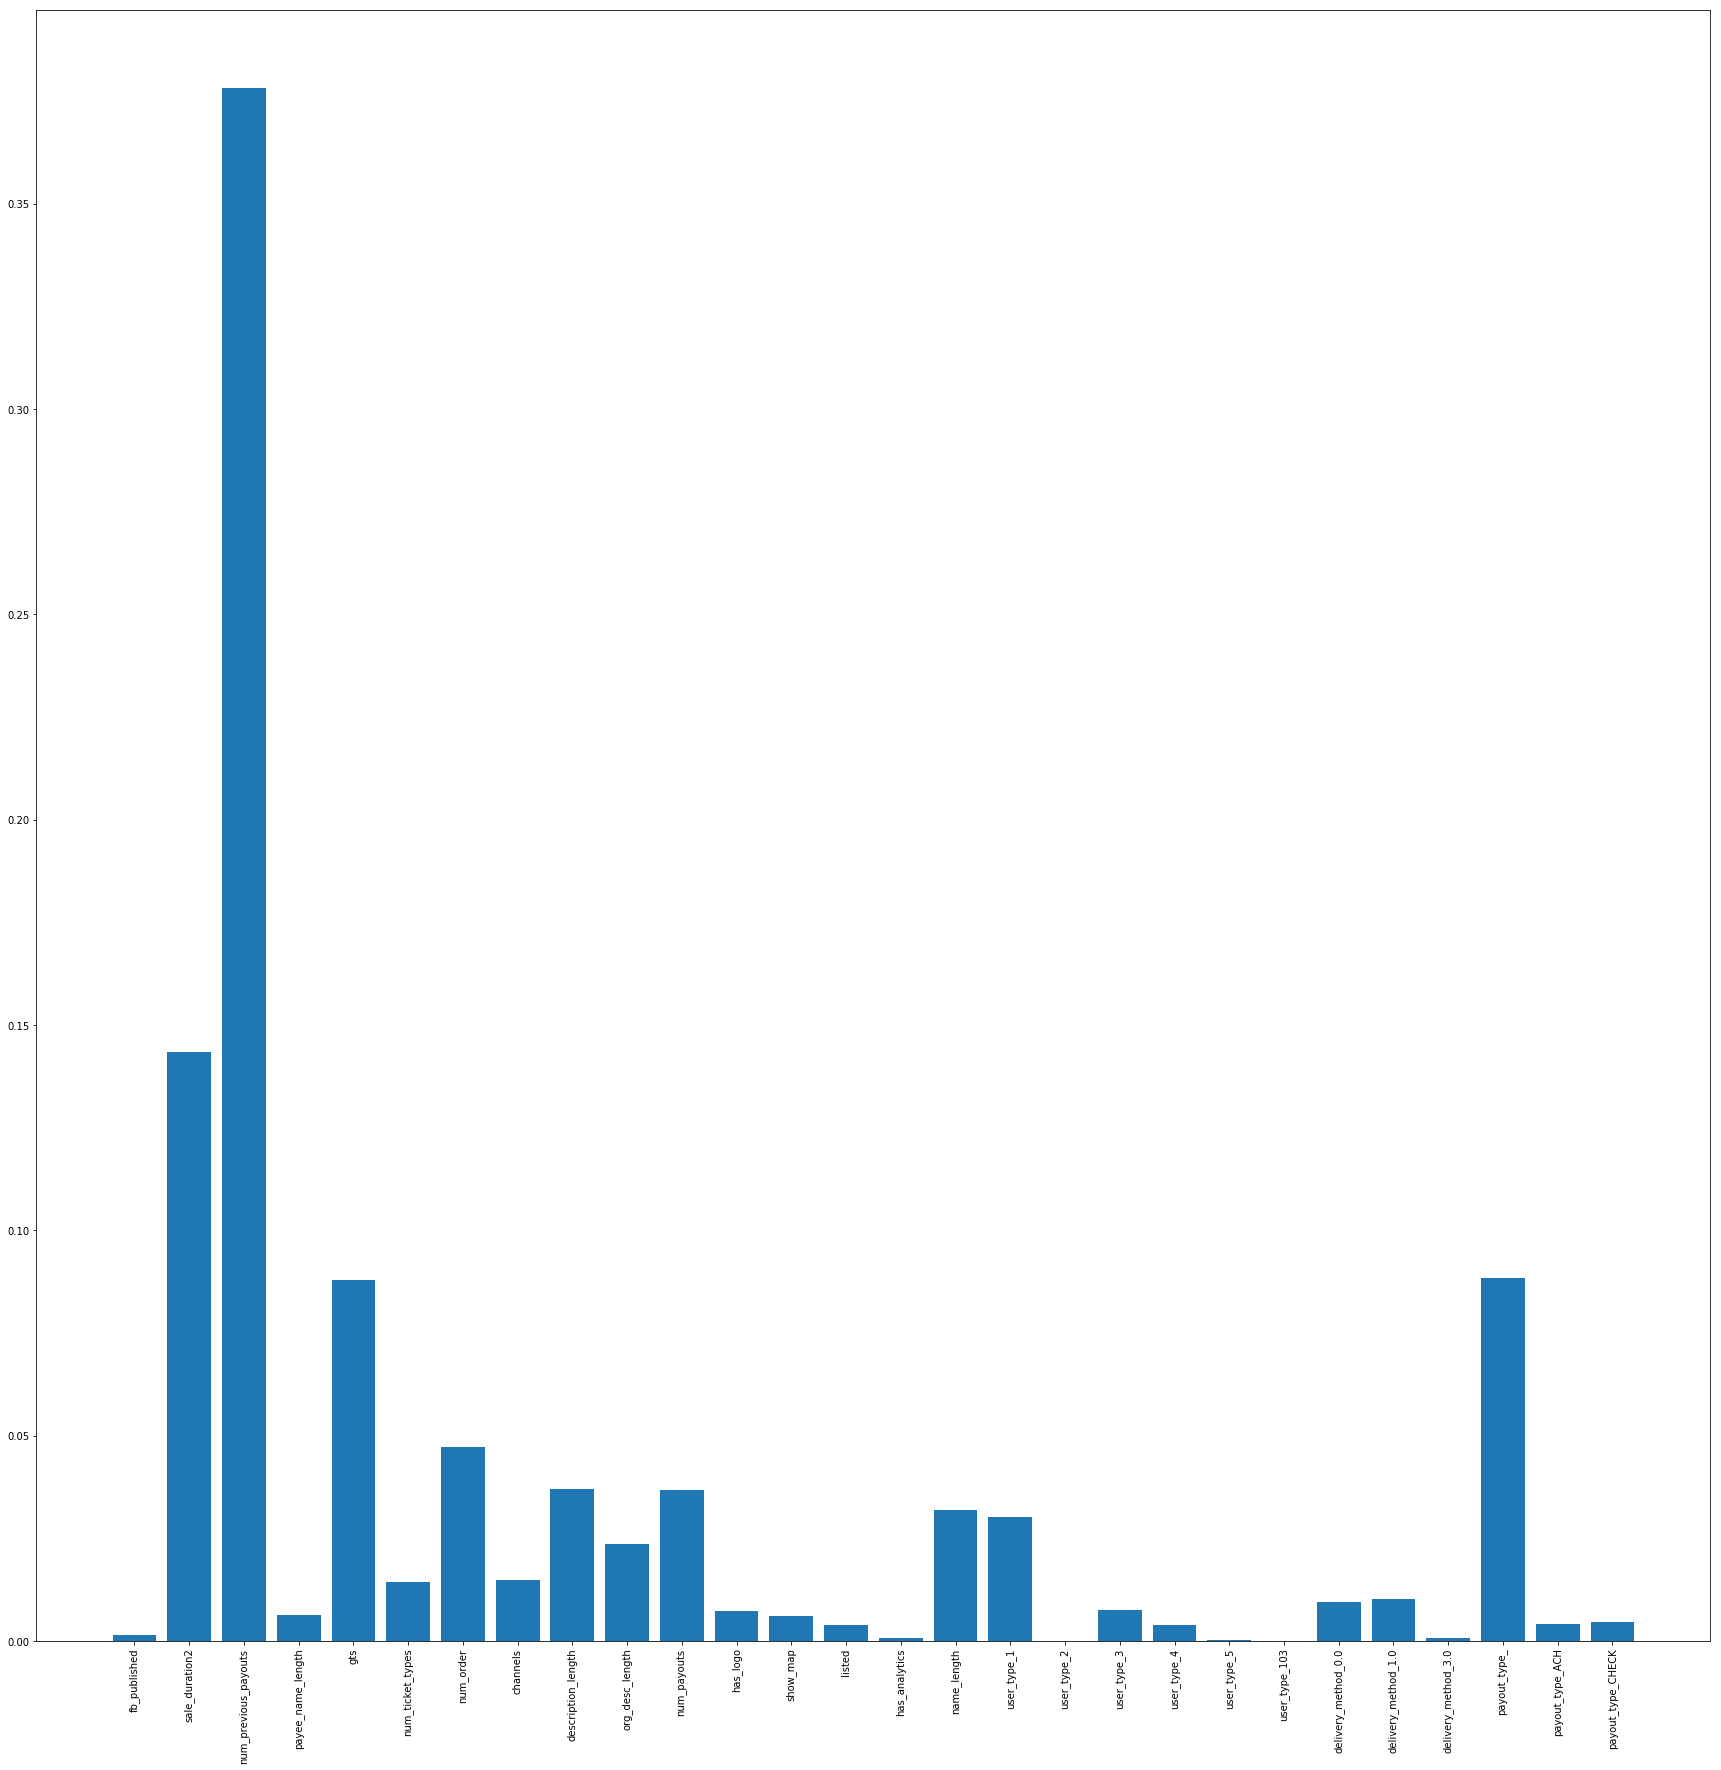

In [64]:
fig, ax = plt.subplots(1,1,figsize=(30,30))
x_labels = df_test.columns
num_cols = range(1, len(df_test.columns)+1)
plt.bar(num_cols,rfc1.feature_importances_,align='center')
plt.xticks(num_cols,x_labels,rotation='vertical')
plt.show()

In [579]:
X_train.columns.tolist()

[u'fb_published',
 u'sale_duration2',
 'num_previous_payouts',
 'payee_name_length',
 u'gts',
 'num_ticket_types',
 u'num_order',
 'event_length',
 u'channels',
 'time_to_withdrawl',
 'description_length',
 'org_desc_length',
 u'num_payouts',
 u'has_logo',
 u'show_map',
 u'listed',
 u'has_analytics',
 u'name_length',
 'user_type_1',
 'user_type_2',
 'user_type_3',
 'user_type_4',
 'user_type_5',
 'user_type_103',
 "country_and_currency_(None, u'AUD')",
 "country_and_currency_(None, u'CAD')",
 "country_and_currency_(None, u'GBP')",
 "country_and_currency_(None, u'USD')",
 "country_and_currency_(u'', u'AUD')",
 "country_and_currency_(u'', u'CAD')",
 "country_and_currency_(u'', u'EUR')",
 "country_and_currency_(u'', u'GBP')",
 "country_and_currency_(u'', u'NZD')",
 "country_and_currency_(u'', u'USD')",
 "country_and_currency_(u'A1', u'AUD')",
 "country_and_currency_(u'A1', u'GBP')",
 "country_and_currency_(u'A1', u'USD')",
 "country_and_currency_(u'AE', u'USD')",
 "country_and_currency_(u

In [434]:
len(df['object_id'].unique())

14337

In [440]:
len(df['ticket_types'][2])

1

In [536]:
df['payee_name']

0                                                         
1                                                      RUF
2                            University Preparation School
3                                                         
4              Arts and Business Council or Greater Boston
5                                      Bluegrass Stallions
6                                                         
7                                                         
8                                                         
9                                                         
10                                                   SFFSN
11                                                        
12       Ft Worth Business Assistance Center, attn: Che...
13                                                        
14                                             Simply Inc.
15                                         Reel Link Films
16                                         Reel Link Fil